---
<pre>
<b>Author      : NAVEEN KUMAR M
Task        : Sales Analysis 
Type        : EDA - Project
To do       : Analysing the Sales Pattern
</pre>
---

## Import necessary Libraries

In [254]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats import skewnorm
import warnings

warnings.filterwarnings('ignore')
%matplotlib notebook


# Data Collection

## Importing the 12 Months Sales Data

In [2]:
jan_2019 = pd.read_csv("./Sales_Data/Sales_January_2019.csv")
feb_2019 = pd.read_csv("./Sales_Data/Sales_February_2019.csv")
mar_2019 = pd.read_csv("./Sales_Data/Sales_March_2019.csv")
apr_2019 = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
may_2019 = pd.read_csv("./Sales_Data/Sales_May_2019.csv")
jun_2019 = pd.read_csv("./Sales_Data/Sales_June_2019.csv")
jul_2019 = pd.read_csv("./Sales_Data/Sales_July_2019.csv")
aug_2019 = pd.read_csv("./Sales_Data/Sales_August_2019.csv")
sep_2019 = pd.read_csv("./Sales_Data/Sales_September_2019.csv")
oct_2019 = pd.read_csv("./Sales_Data/Sales_October_2019.csv")
nov_2019 = pd.read_csv("./Sales_Data/Sales_November_2019.csv")
dec_2019 = pd.read_csv("./Sales_Data/Sales_December_2019.csv")

## Columns and shape of the data 

In [3]:
my_list_df = [jan_2019, feb_2019, mar_2019, apr_2019, may_2019, jun_2019,
              jul_2019, aug_2019, sep_2019, oct_2019, nov_2019, dec_2019]

for month in my_list_df:
    print(month.shape, month.columns.to_list() ,end="\n\n", sep=" --> ")

(9723, 6) --> ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']

(12036, 6) --> ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']

(15226, 6) --> ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']

(18383, 6) --> ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']

(16635, 6) --> ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']

(13622, 6) --> ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']

(14371, 6) --> ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']

(12011, 6) --> ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']

(11686, 6) --> ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']

(20379, 6) --> ['Order ID', '

## Data Types of the all the Datasets

In [4]:
pd.DataFrame(jan_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


In [5]:
pd.DataFrame(feb_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


In [6]:
pd.DataFrame(mar_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


In [7]:
pd.DataFrame(apr_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


In [8]:
pd.DataFrame(may_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


In [9]:
pd.DataFrame(jun_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


In [10]:
pd.DataFrame(jul_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


In [11]:
pd.DataFrame(aug_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


In [12]:
pd.DataFrame(sep_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


In [13]:
pd.DataFrame(oct_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


In [14]:
pd.DataFrame(nov_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


In [15]:
pd.DataFrame(dec_2019.dtypes,columns=['Types']).T

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Types,object,object,object,object,object,object


## Examining the data

- As we looking through the above data all are having the same columns and same data types
- Lets merge the data

## Merging the Data

In [16]:
#df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales_Data/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)            # reading the each of the file
    all_months_data = pd.concat([all_months_data, df])  # merging into one file

all_months_data.to_csv('all_months_data.csv', index=False)

## Reading the Merged DataFrame

In [17]:
all_data = pd.read_csv('all_months_data.csv')

all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


- As Looking from the above data,Initially we have got
    - <b>3 Categorical Columns</b> (Order ID, Product, Purchase Address)
    - <b>3 Numerical Columns</b> (Quantity Ordered, Price Each, Order Date)
- There is also presence of Missing values and inconsistent Data

# Data Cleaning

### Removing the NaN values

In [18]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [19]:
# Percentage of Missing Values
all_data.isnull().mean().round(4)*100

Order ID            0.29
Product             0.29
Quantity Ordered    0.29
Price Each          0.29
Order Date          0.29
Purchase Address    0.29
dtype: float64

In [20]:
# Finding NaN
find_nan = all_data[all_data.isna().any(axis=1)]
display(find_nan)

# Removing NaN
all_data = all_data.dropna(how='all')
display(all_data.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [21]:
all_data.reset_index(drop=True,inplace=True)

In [21]:
#all_data.reset_index(inplace=True)
#all_data.drop("index",axis=1,inplace=True)

In [22]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Removing Data inconsistencies

- 'Order Date' column have some string values

In [23]:
all_data = all_data[all_data['Order Date'].str[0:2] !='Or']

### Converting columns into correct Data types

In [24]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [26]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

# Augment data with additional columns

- We can obtain more sales behaviour info by adding and splitting columns from 'Order Date' and 'Purchase Address'

### Adding Month column

In [27]:
all_data['Month'] = all_data['Order Date'].dt.month
all_data['Month'] = all_data['Month'].astype('object')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### Adding Hour and Minutes Columns

In [28]:
all_data['Hour'] = all_data["Order Date"].dt.hour
all_data['Minutes'] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27


### Adding Sales Column

In [29]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minutes,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,11.99


### Adding City Column

In [30]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2][:3]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minutes,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,23.90,Dallas ( TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,99.99,Boston ( MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,600.00,Los Angeles ( CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,11.99,Los Angeles ( CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,11.99,Los Angeles ( CA)


In [31]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
Hour                         int64
Minutes                      int64
Sales                      float64
City                        object
dtype: object

In [32]:
all_data.shape

(185950, 11)

In [33]:
all_data.describe(include = 'all',datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Order ID,185950,178437,160873,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product,185950,19,USB-C Charging Cable,21903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity Ordered,185950.0,NaN,NaN,NaN,1.124383,1.0,1.0,1.0,1.0,9.0,0.442793
Price Each,185950.0,NaN,NaN,NaN,184.399735,2.99,11.95,14.95,150.0,1700.0,332.73133
Order Date,185950,NaN,NaN,NaN,2019-07-18 21:54:38.887550464,2019-01-01 03:07:00,2019-04-16 21:05:15,2019-07-17 20:40:30,2019-10-26 08:14:00,2020-01-01 05:13:00,NaN
Purchase Address,185950,140787,"193 Forest St, San Francisco, CA 94016",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,185950.0,12.0,12.0,24984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hour,185950.0,NaN,NaN,NaN,14.413305,0.0,11.0,15.0,19.0,23.0,5.423416
Minutes,185950.0,NaN,NaN,NaN,29.481361,0.0,14.0,29.0,45.0,59.0,17.317573
Sales,185950.0,NaN,NaN,NaN,185.490917,2.99,11.95,14.95,150.0,3400.0,332.919771


- Finally we got
	- <b>5 Categorical columns</b> (Order ID, Product, Purchase Address, City, Month)
    - <b>6 Numerical columns</b> (Quantity Ordered, Price Each, Order Date, Sales, Hour, Minutes)

# Univariate Analysis

- Here we look into the distributions of Sales, Month, Hours and also the City and each Product

<IPython.core.display.Javascript object>


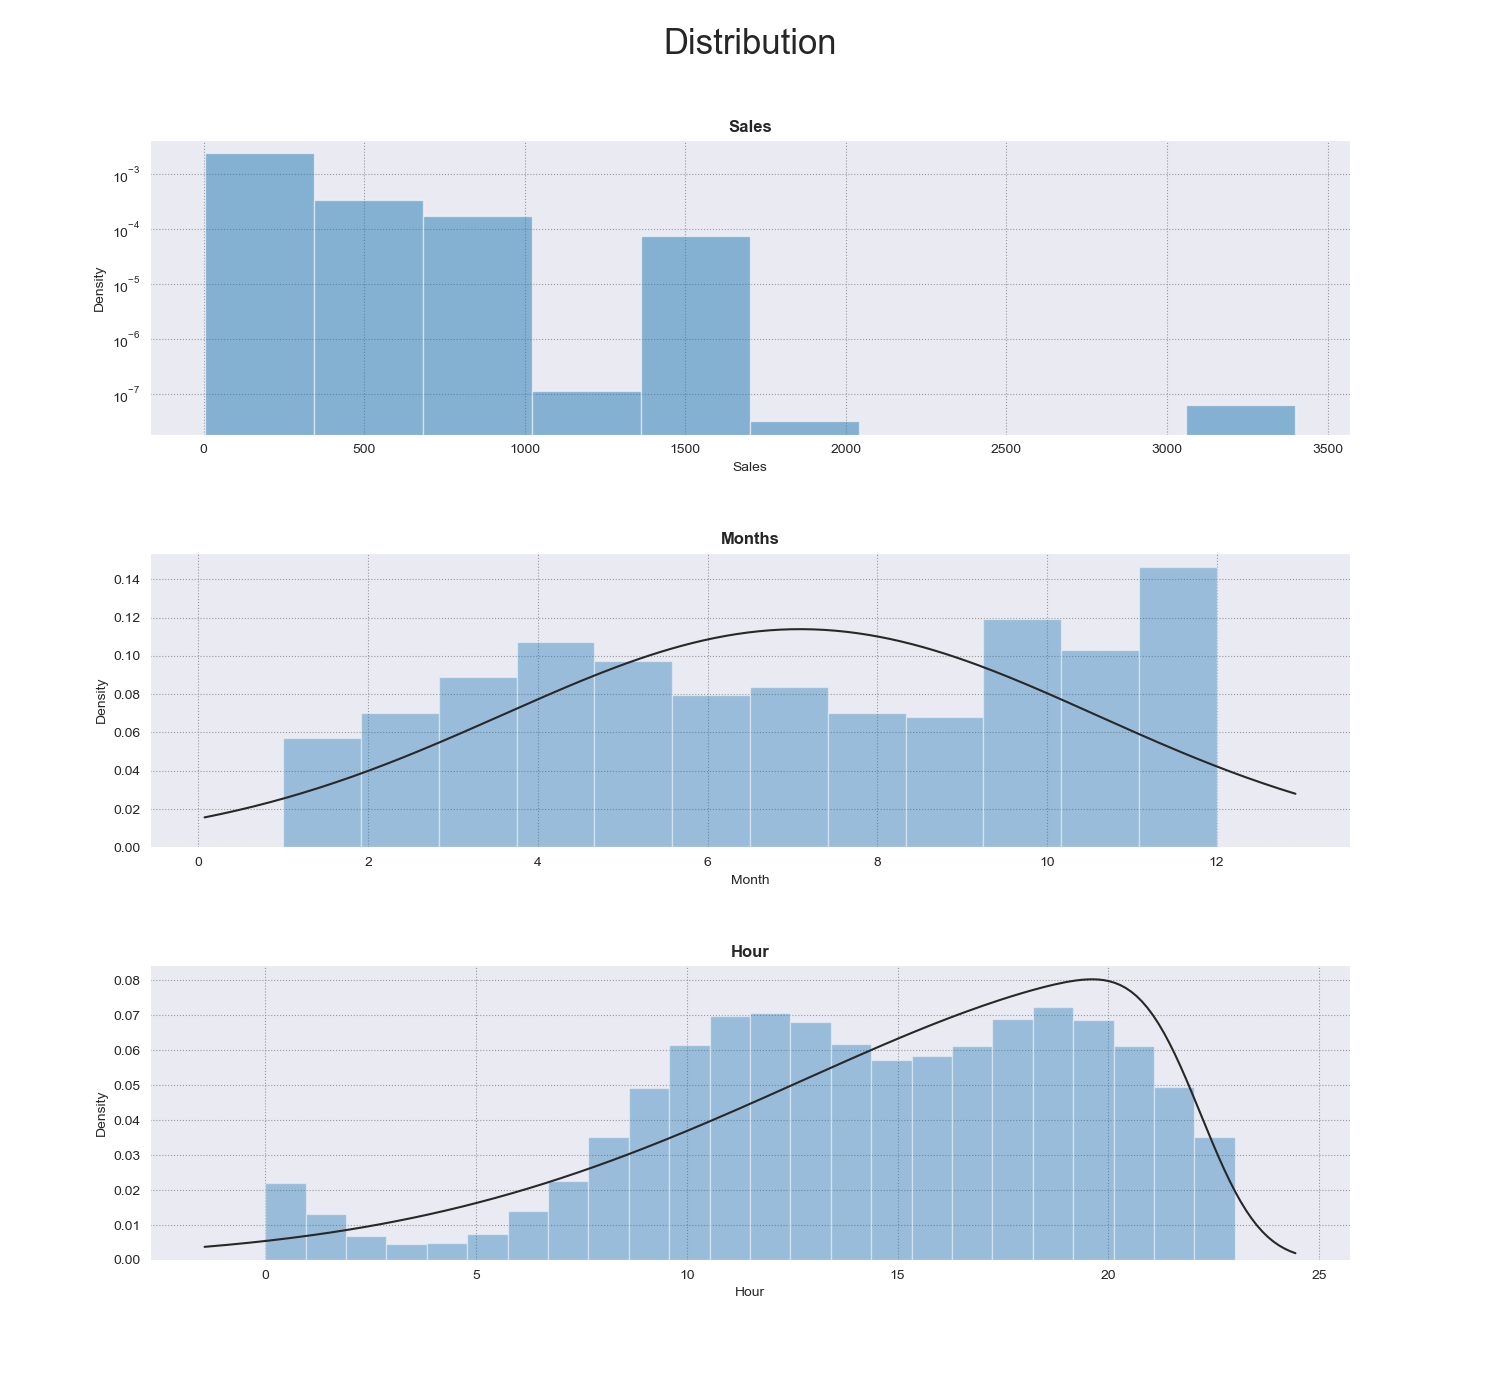

In [116]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,14))

# Plot first subplot
axes[0].hist(all_data['Sales'],density=True, log=True, alpha=0.5)
axes[0].set_title('Sales',fontweight='bold')
axes[0].set_ylabel('Density')
axes[0].set_xlabel('Sales')


# Plot second subplot
sb.distplot(all_data['Month'], bins=12, kde=False, norm_hist=True, fit=skewnorm, ax=axes[1])
axes[1].set_ylabel('Density')
axes[1].set_title('Months',fontweight='bold')


# Plot Third subplot
sb.distplot(all_data['Hour'], bins=24,kde=False,fit=skewnorm, norm_hist=True, ax=axes[2])
axes[2].set_title('Hour',fontweight='bold')
axes[2].set_ylabel('Density')

fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

fig.suptitle('Distribution', fontsize=25)

# Show the plot
plt.show()

In [164]:
## Sales
#plt.figure(figsize=(8,6))
#plt.hist(all_data['Sales'],density=True, log=True, alpha=0.5)
#plt.title('Distribution of Sales')
#plt.ylabel('Density')

## Months
#plt.figure(figsize=(8,6))
#sb.distplot(all_data['Month'], bins=12, kde=False, norm_hist=True, fit=skewnorm)
#plt.ylabel('Density')
#plt.title('Distribution of Months')

## Hour
#plt.figure(figsize=(8,6))
#sb.distplot(all_data['Hour'], bins=24,kde=False,fit=skewnorm, norm_hist=True)
#plt.title('Distribution of Hour')
#plt.ylabel('Density')

#plt.show()

<IPython.core.display.Javascript object>


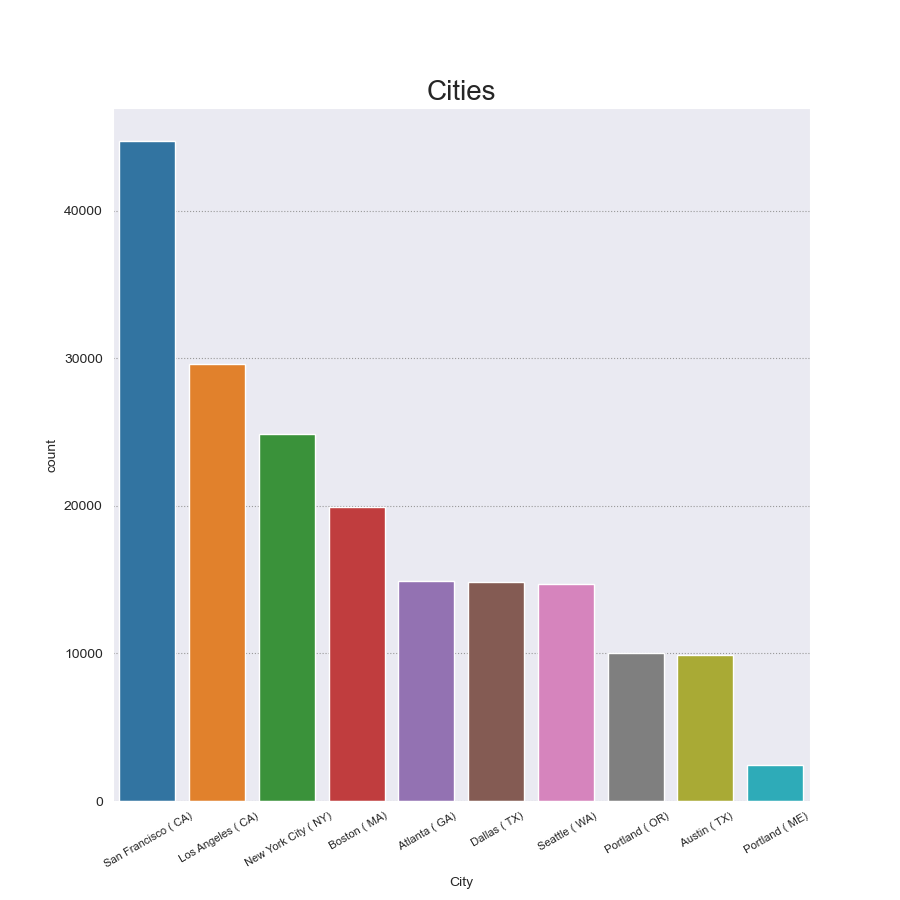

In [167]:
city_counts = all_data['City'].value_counts()
sorted_city_counts = city_counts.sort_values(ascending=False)


plt.figure(figsize=(9,9))
sb.countplot(x='City', data=all_data, order=sorted_city_counts.index)
plt.xticks(fontsize=8,rotation=30)
plt.title('Cities',fontsize=20);

<IPython.core.display.Javascript object>


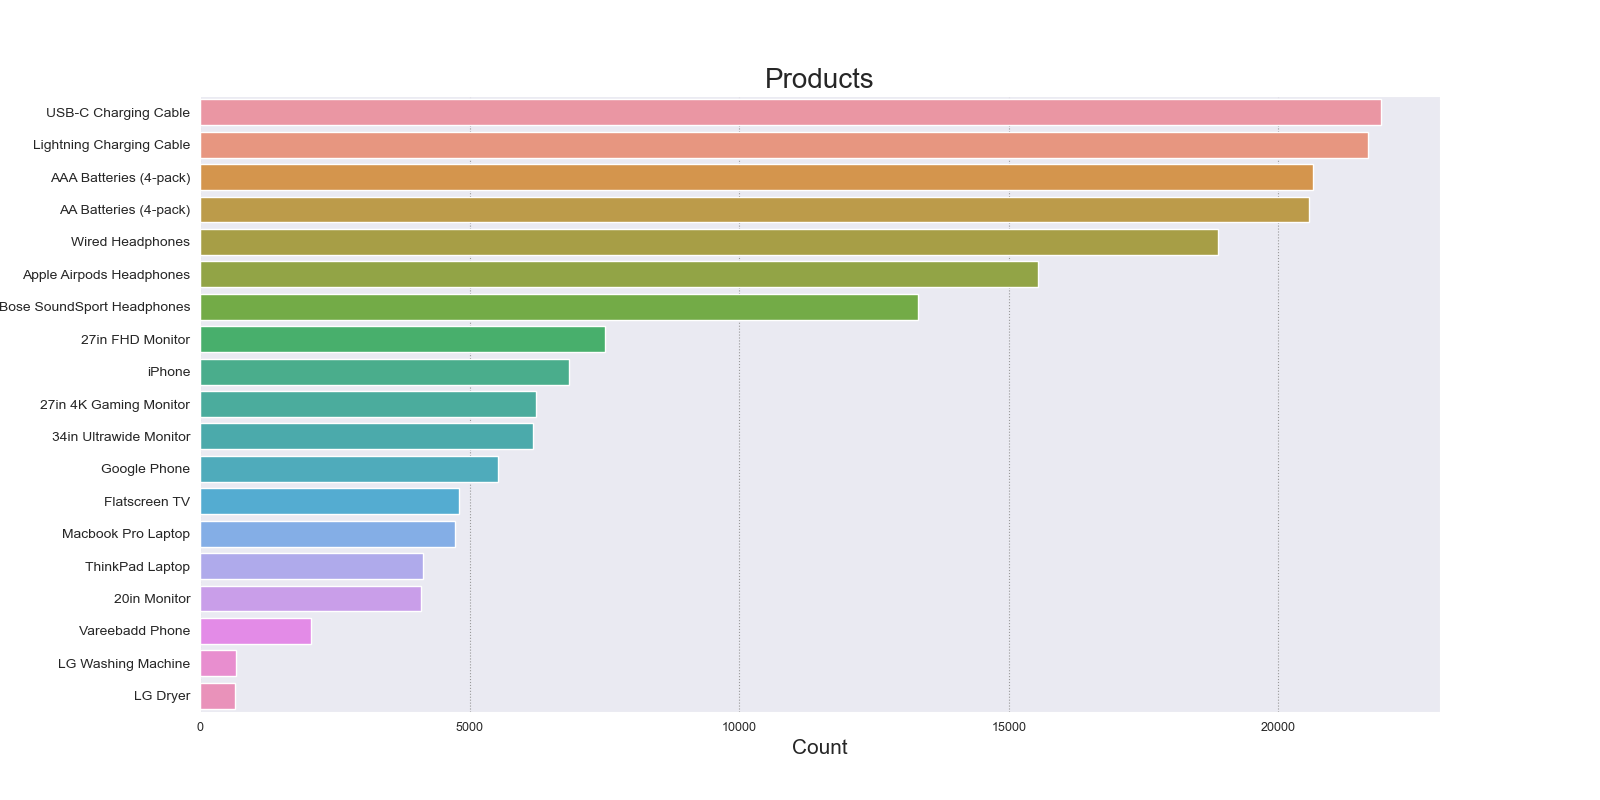

In [168]:
product_counts = all_data['Product'].value_counts()
sorted_product_counts = product_counts.sort_values(ascending=False)

plt.figure(figsize=(16,8))
sb.countplot(y='Product', data=all_data, order=sorted_product_counts.index, orient='h')
plt.xticks(fontsize=9)
plt.xlabel('Count',fontsize=15)
plt.title('Products',fontsize=20);

In [88]:
#counts, bin_edges = np.histogram(all_data['Month'],bins=12,density=True)

#pdf = counts/(sum(counts))

#print(pdf);
#print(bin_edges);

#cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf)
#plt.plot(bin_edges[1:],cdf)
#plt.grid(True)

In [86]:
#sb.ecdfplot(all_data['Sales'])

#### Observations
	- As We can see Sales are more in December followed by October due to Christmas and Halloween respectively.On Holiday 
      seasons more Sales Expected
    - On Hourly basis, seems higher around 11 am to 1 pm and 18 pm to 20 pm.
    - San Francisco stands out Top among all the Cities and Accessories Solds the most among the Products.

# Multivariate Analysis

 - Let's Look into the correlation between two or more columns

In [169]:
corelation = all_data.corr()
corelation

,Quantity Ordered,Price Each,Hour,Minutes,Sales
Quantity Ordered,1.000000,-0.148272,-0.002218,0.001225,-0.139417
Price Each,-0.148272,1.000000,0.001721,-0.002163,0.999203
Hour,-0.002218,0.001721,1.000000,-0.015345,0.001668
Minutes,0.001225,-0.002163,-0.015345,1.000000,-0.002162
Sales,-0.139417,0.999203,0.001668,-0.002162,1.000000


<IPython.core.display.Javascript object>


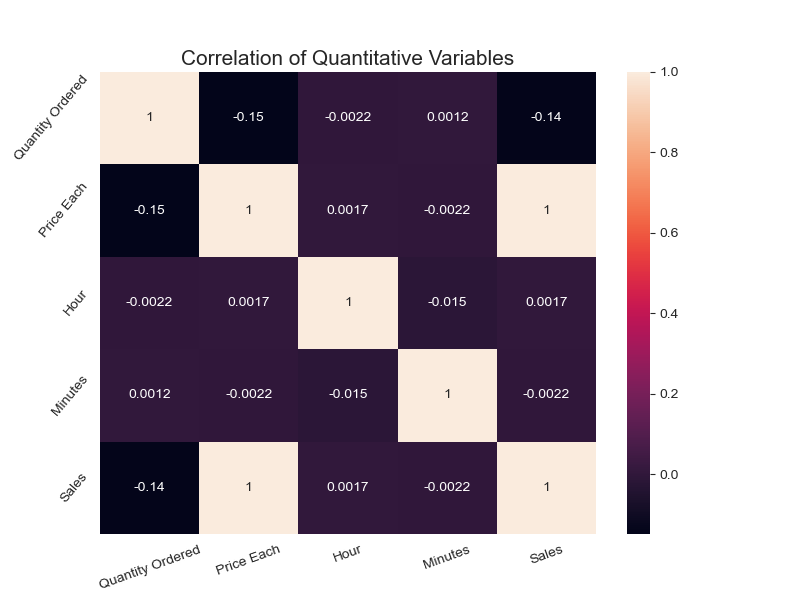

In [172]:
plt.figure(figsize=(8,6))
sb.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)
plt.xticks(fontsize=10,rotation=20)
plt.yticks(fontsize=10,rotation=50)
plt.title('Correlation of Quantitative Variables',fontsize=15)
plt.show()

#### Note:
	- Price and Sales are more related to each other.
    - Let's Visualize this with Scatter plot.

<IPython.core.display.Javascript object>


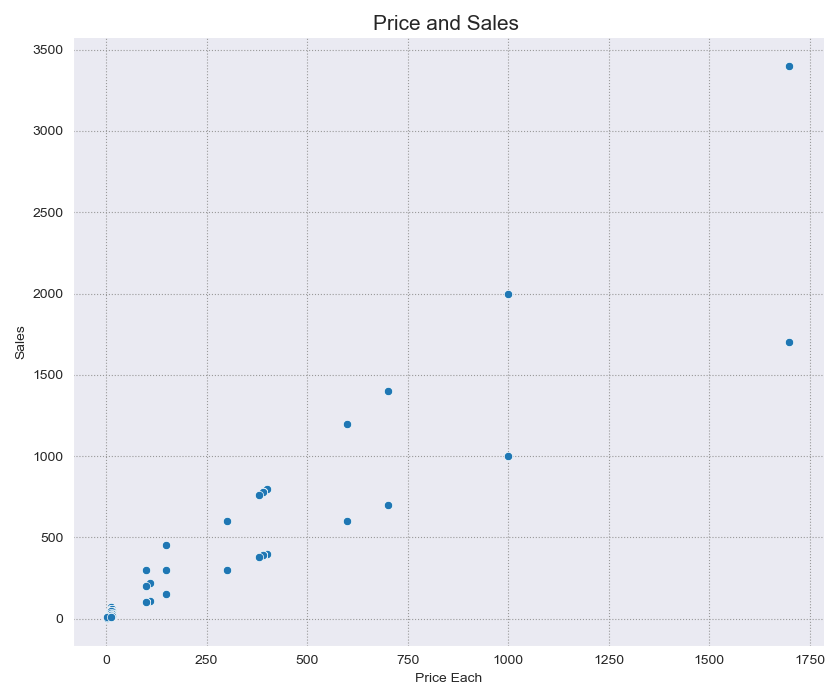

In [201]:
sb.relplot(x='Price Each',y='Sales',data=all_data, height=7, aspect=1.2)
plt.title('Price and Sales ',fontsize=15)
plt.tight_layout()

In [173]:
sum_quantity = (all_data.groupby(['City','Product'])
     ['Quantity Ordered'].sum()
     .unstack()
    )

sum_quantity

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
City,,,,,,,,,,,,,,,,,,,
Atlanta ( GA),342,493,588,482,2193,2359,1266,1084,407,451,59,52,1879,379,357,1915,173,1579,544
Austin ( TX),230,318,360,328,1424,1668,887,707,242,274,55,26,1307,251,210,1251,108,1130,377
Boston ( MA),394,675,797,671,3016,3461,1653,1416,554,593,59,72,2491,479,447,2561,214,2222,753
Dallas ( TX),343,481,587,512,2261,2504,1194,1063,420,461,44,51,1864,382,345,1852,178,1669,519
Los Angeles ( CA),658,1003,1223,955,4438,4967,2473,2125,727,848,116,105,3772,751,641,3782,317,3270,1118
New York City ( NY),560,842,1072,868,3630,4124,2098,1794,628,758,77,85,3041,657,560,3269,281,2707,881
Portland ( ME),59,85,114,76,389,358,233,180,62,77,6,11,269,63,53,340,17,279,79
Portland ( OR),219,349,416,327,1550,1722,866,709,250,278,31,26,1262,274,221,1242,107,1083,371
San Francisco ( CA),1000,1460,1814,1446,6555,7408,3733,3317,1154,1358,143,180,5557,1136,963,5894,494,4966,1661


<IPython.core.display.Javascript object>


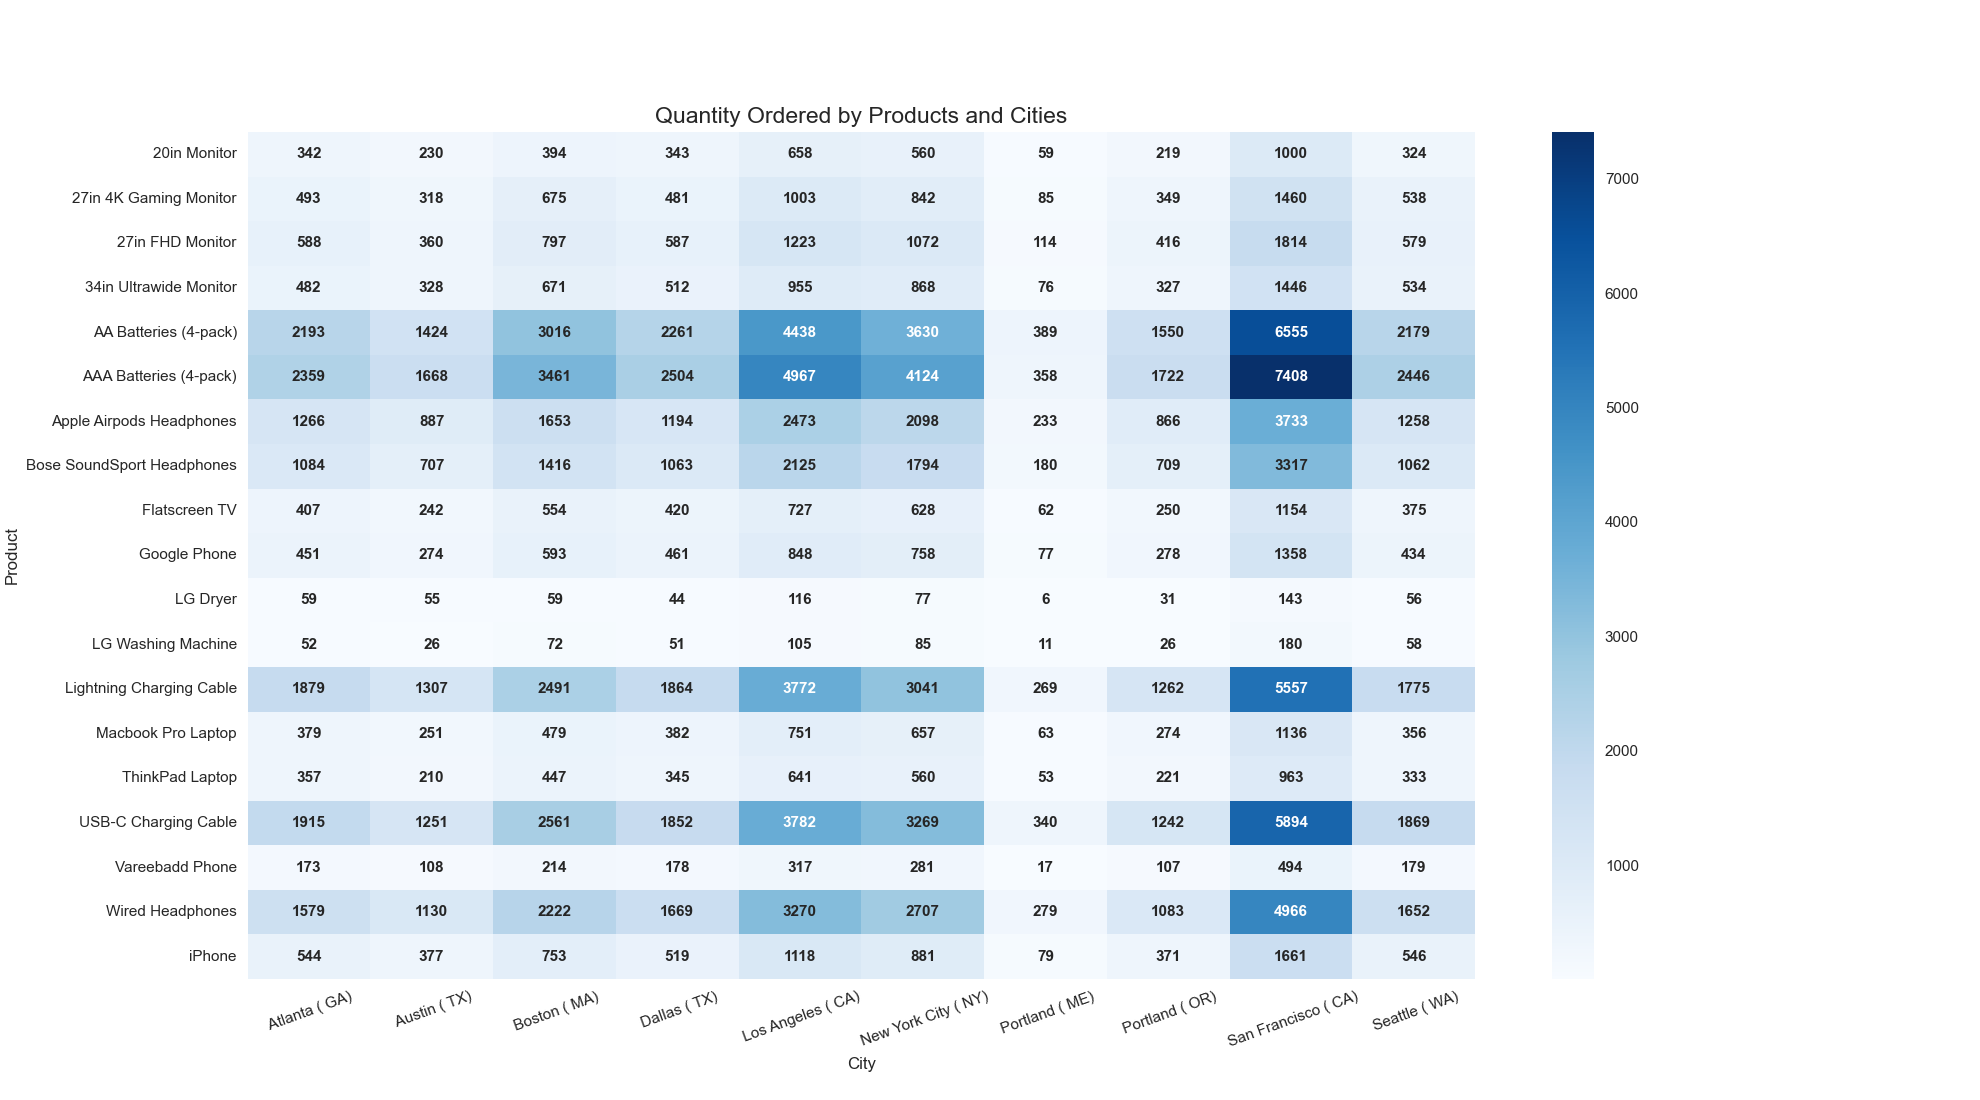

In [293]:
plt.figure(figsize=(18,10))
sb.heatmap(sum_quantity.T,annot=True,cmap='Blues',fmt=".0f",annot_kws={'fontweight':'bold'})
plt.xticks(fontsize=10,rotation=20)
#plt.yticks(fontsize=8,rotation=50)
plt.title('Quantity Ordered by Products and Cities',fontsize=15)
plt.show()

In [175]:
sum_sales = (all_data.groupby(['City','Product'])
     ['Sales'].sum()
     .unstack()
    )

sum_sales

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
City,,,,,,,,,,,,,,,,,,,
Atlanta ( GA),37616.58,192265.07,88194.12,183155.18,8421.12,7053.41,189900.0,108389.16,122100.0,270600.0,35400.0,31200.0,28091.05,644300.0,356996.43,22884.25,69200.0,18932.21,380800.0
Austin ( TX),25297.70,124016.82,53996.40,124636.72,5468.16,4987.32,133050.0,70692.93,72600.0,164400.0,33000.0,15600.0,19539.65,426700.0,209997.90,14949.45,43200.0,13548.70,263900.0
Boston ( MA),43336.06,263243.25,119542.03,254973.29,11581.44,10348.39,247950.0,141585.84,166200.0,355800.0,35400.0,43200.0,37240.45,814300.0,446995.53,30603.95,85600.0,26641.78,527100.0
Dallas ( TX),37726.57,187585.19,88044.13,194554.88,8682.24,7486.96,179100.0,106289.37,126000.0,276600.0,26400.0,30600.0,27866.80,649400.0,344996.55,22131.40,71200.0,20011.31,363300.0
Los Angeles ( CA),72373.42,391159.97,183437.77,362890.45,17041.92,14851.33,370950.0,212478.75,218100.0,508800.0,69600.0,63000.0,56391.40,1276700.0,640993.59,45194.90,126800.0,39207.30,782600.0
New York City ( NY),61594.40,328371.58,160789.28,329831.32,13939.20,12330.76,314700.0,179382.06,188400.0,454800.0,46200.0,51000.0,45462.95,1116900.0,559994.40,39064.55,112400.0,32456.93,616700.0
Portland ( ME),6489.41,33149.15,17098.86,28879.24,1493.76,1070.42,34950.0,17998.20,18600.0,46200.0,3600.0,6600.0,4021.55,107100.0,52999.47,4063.00,6800.0,3345.21,55300.0
Portland ( OR),24087.81,136106.51,62395.84,124256.73,5952.00,5148.78,129900.0,70892.91,75000.0,166800.0,18600.0,15600.0,18866.90,465800.0,220997.79,14841.90,42800.0,12985.17,259700.0
San Francisco ( CA),109990.00,569385.40,272081.86,549465.54,25171.20,22149.92,559950.0,331666.83,346200.0,814800.0,85800.0,108000.0,83077.15,1931200.0,962990.37,70433.30,197600.0,59542.34,1162700.0


<IPython.core.display.Javascript object>


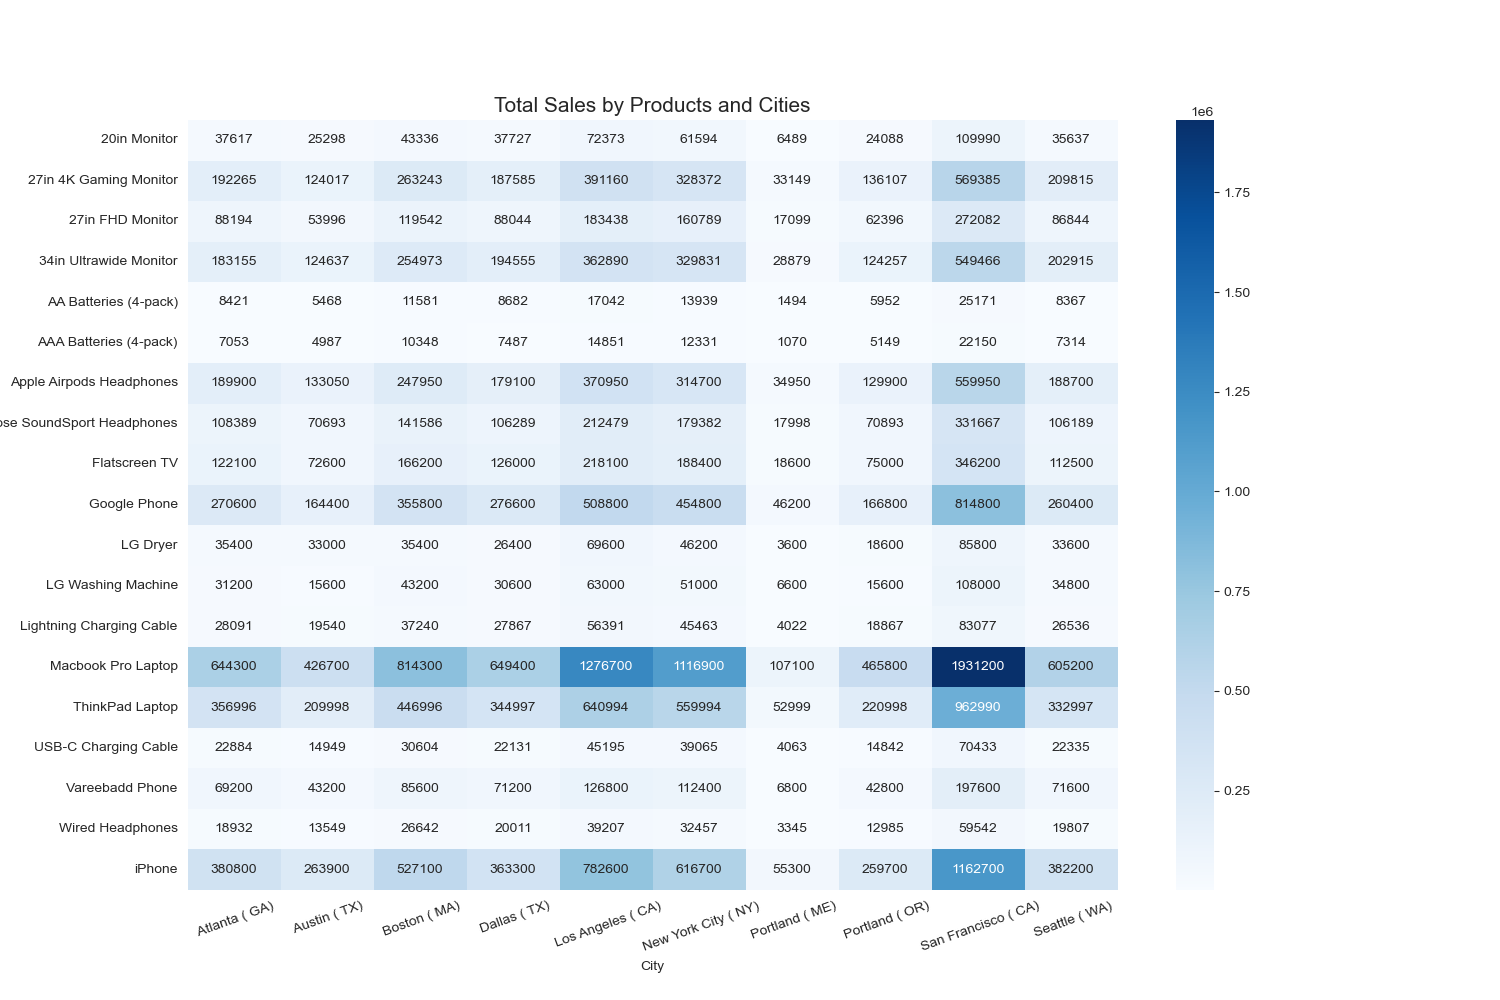

In [179]:
plt.figure(figsize=(15,10))
sb.heatmap(sum_sales.T,annot=True,cmap='Blues',fmt=".0f")
plt.xticks(fontsize=10,rotation=20)
plt.title('Total Sales by Products and Cities',fontsize=15)
plt.show()

#### Observations
	-From Quantity wise 'AAA- batteries' solds the most.
    -From Sales wise 'MacBook Pro Laptop' has higher range of total sales.

In [181]:
#ax = a.plot(kind='bar', figsize=(10,8))

#ax.set_title('Product Counts by City')
#ax.set_xlabel('City')
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
#ax.set_ylabel('Quantity Ordered')


#ax.legend(title='Product', bbox_to_anchor=(0, 1), loc='upper left',fontsize=8)

In [313]:
#sb.boxplot(x='Sales',y='City',data=all_data)

In [314]:
#sb.violinplot(x='City',y='Sales',data=all_data,size=8)

In [203]:
#freq_table = all_data.groupby(['Product', 'Price Each']).size().reset_index()
#freq_table

In [183]:
#product_sales=all_data.groupby('Product')['Sales'].sum()
#product_sales

# Asking and Answering Questions

## Q1: Best month for Sales? How much Earned that Month?

In [204]:
all_data.groupby('Month').sum().sort_values(by=['Sales'],ascending=False)

,Quantity Ordered,Price Each,Hour,Minutes,Sales
Month,,,,,
12,28114,4588415.41,359978,733082,4613443.34
10,22703,3715554.83,290650,598437,3736726.88
4,20558,3367671.02,262259,544186,3390670.24
11,19798,3180600.68,254865,518231,3199603.20
5,18667,3135125.13,238780,487899,3152606.75
3,17005,2791207.83,218969,447559,2807100.38
7,16072,2632539.56,206169,417349,2647775.76
6,15253,2562025.61,195528,402436,2577802.26
8,13448,2230345.42,172289,353857,2244467.88


<IPython.core.display.Javascript object>


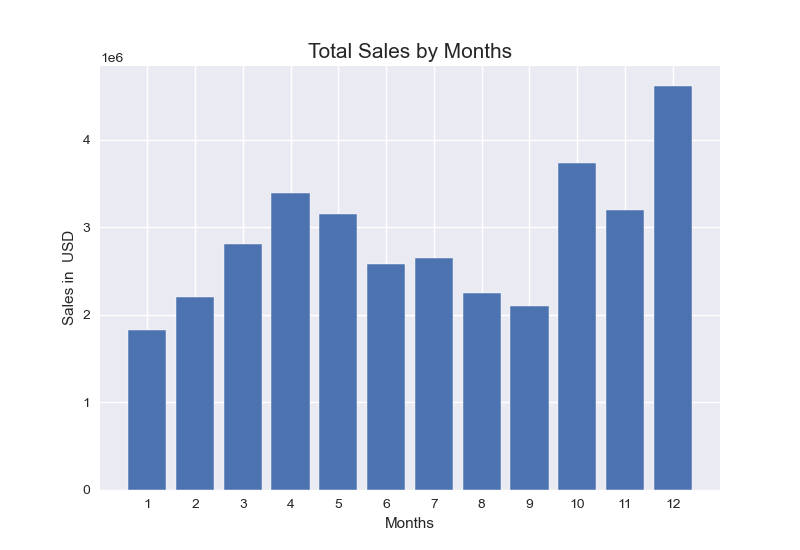

In [206]:
plt.style.use('seaborn')

months = range(1,13)
results = all_data.groupby('Month').sum()
plt.bar(months, results['Sales'])

plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in  USD')
plt.title('Total Sales by Months',fontsize=15)

plt.show()

## Q2: City with Highest number of Sales

In [207]:
result = all_data.groupby('City').sum()
result

,Quantity Ordered,Price Each,Hour,Minutes,Sales
City,,,,,
Atlanta ( GA),16602,2779908.20,214264,442932,2795498.58
Austin ( TX),11153,1809873.61,141946,289060,1819581.75
Boston ( MA),22528,3637409.77,288225,590442,3661642.01
Dallas ( TX),16730,2752627.82,214390,435155,2767975.40
Los Angeles ( CA),33289,5421435.23,427444,866638,5452570.80
New York City ( NY),27932,4635370.83,357696,733598,4664317.43
Portland ( ME),2750,447189.25,35211,72856,449758.27
Portland ( OR),11303,1860558.22,144421,295533,1870732.34
San Francisco ( CA),50239,8211461.74,643265,1319477,8262203.91


In [208]:
#plt.style.use('seaborn')

City = [city for city,df in all_data.groupby('City')]

#results = all_data.groupby('City').sum()

#plt.bar(City, results['Sales'])

#plt.xticks(City, rotation = 40, fontsize=6)
#plt.xlabel('Cities')
#plt.ylabel('Sales in  USD')


#plt.show()
City

[' Atlanta ( GA)',
 ' Austin ( TX)',
 ' Boston ( MA)',
 ' Dallas ( TX)',
 ' Los Angeles ( CA)',
 ' New York City ( NY)',
 ' Portland ( ME)',
 ' Portland ( OR)',
 ' San Francisco ( CA)',
 ' Seattle ( WA)']

<IPython.core.display.Javascript object>


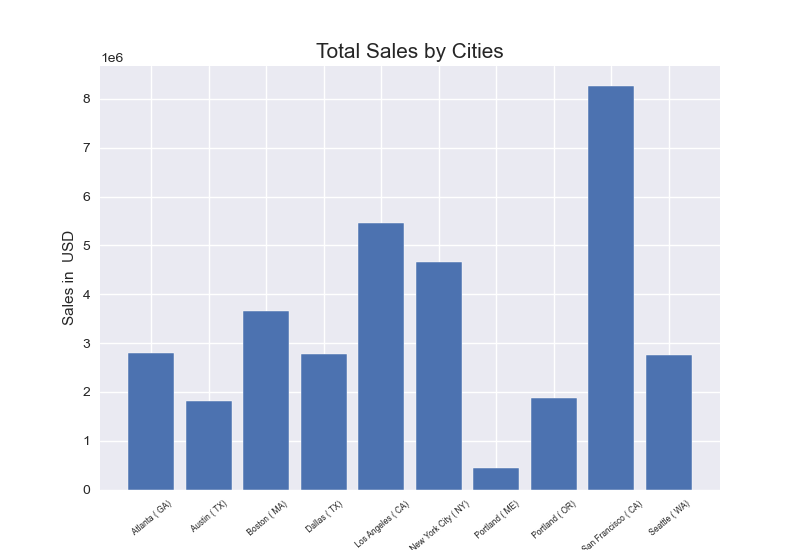

In [210]:
plt.style.use('seaborn')

City = [city for city,df in all_data.groupby('City')]

results = all_data.groupby('City').sum()

plt.bar(City, results['Sales'])

plt.xticks(City, rotation = 40, fontsize=6)
plt.xlabel('Cities')
plt.ylabel('Sales in  USD')
plt.title('Total Sales by Cities',fontsize=15)

plt.show()


## Q3:What time should we display advertisements to maximize likelihood of customer's buying product?

In [211]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Minutes,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,46,23.90,Dallas ( TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,30,99.99,Boston ( MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,600.00,Los Angeles ( CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,38,11.99,Los Angeles ( CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,27,11.99,Los Angeles ( CA)


In [212]:
hours = [hour for hour,df in all_data.groupby('Hour')]
counts = all_data.groupby('Hour').count()


<IPython.core.display.Javascript object>


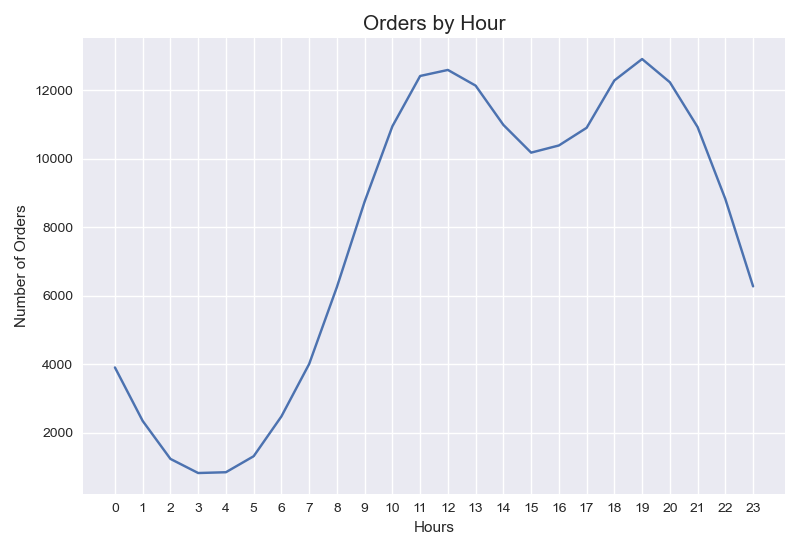

In [214]:
plt.style.use('seaborn')


plt.plot(hours,counts['Minutes'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour',fontsize=15)

plt.tight_layout()
plt.show()


### Insights
	- Recommended to Advertise before 12 pm (12) or 7pm (19)

# Q4: What products are most often sold together?

In [233]:
all_data['Product'].mode()

0    USB-C Charging Cable
Name: Product, dtype: object

In [234]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [235]:
df.groupby('Grouped').size().idxmax()

'iPhone,Lightning Charging Cable'

In [236]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

    
    
    
for key,value in count.most_common(10):
    print(key,value)
    

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Q5: What product sold the most? Why do you think it sold the most?

In [245]:
product = all_data.groupby('Product').sum().reset_index()

product

,Product,Quantity Ordered,Price Each,Hour,Minutes,Sales
0,20in Monitor,4129,451068.99,58764,122252,454148.71
1,27in 4K Gaming Monitor,6244,2429637.70,90916,184331,2435097.56
2,27in FHD Monitor,7550,1125974.93,107540,219948,1132424.50
3,34in Ultrawide Monitor,6199,2348718.19,89076,183480,2355558.01
4,AA Batteries (4-pack),27635,79015.68,298342,609039,106118.40
5,AAA Batteries (4-pack),31017,61716.59,297332,612113,92740.83
6,Apple Airpods Headphones,15661,2332350.00,223304,455570,2349150.00
7,Bose SoundSport Headphones,13457,1332366.75,192445,392603,1345565.43
8,Flatscreen TV,4819,1440000.00,68815,142789,1445700.00
9,Google Phone,5532,3315000.00,79479,162773,3319200.00


<IPython.core.display.Javascript object>


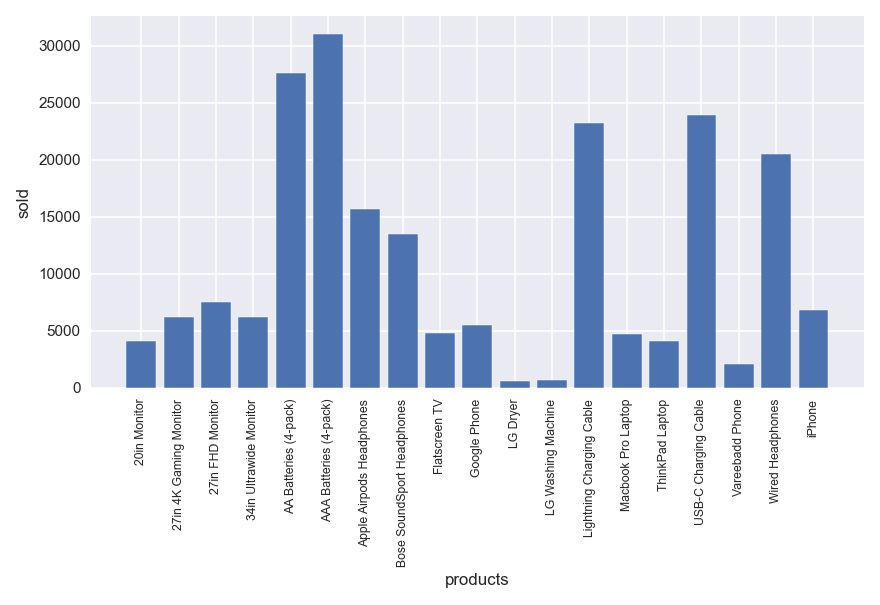

In [246]:
plt.style.use('seaborn')

x = product['Product'].unique()

plt.bar(x,product['Quantity Ordered'])

plt.xticks(x, rotation = 90,fontsize=8)

plt.xlabel('products')
plt.ylabel('sold')


plt.tight_layout()

plt.show()

In [272]:
freq_table = all_data.groupby(['Product', 'Price Each']).size().reset_index()
freq_table

,Product,Price Each,0
0,20in Monitor,109.99,4101
1,27in 4K Gaming Monitor,389.99,6230
2,27in FHD Monitor,149.99,7507
3,34in Ultrawide Monitor,379.99,6181
4,AA Batteries (4-pack),3.84,20577
5,AAA Batteries (4-pack),2.99,20641
6,Apple Airpods Headphones,150.00,15549
7,Bose SoundSport Headphones,99.99,13325
8,Flatscreen TV,300.00,4800
9,Google Phone,600.00,5525


<IPython.core.display.Javascript object>


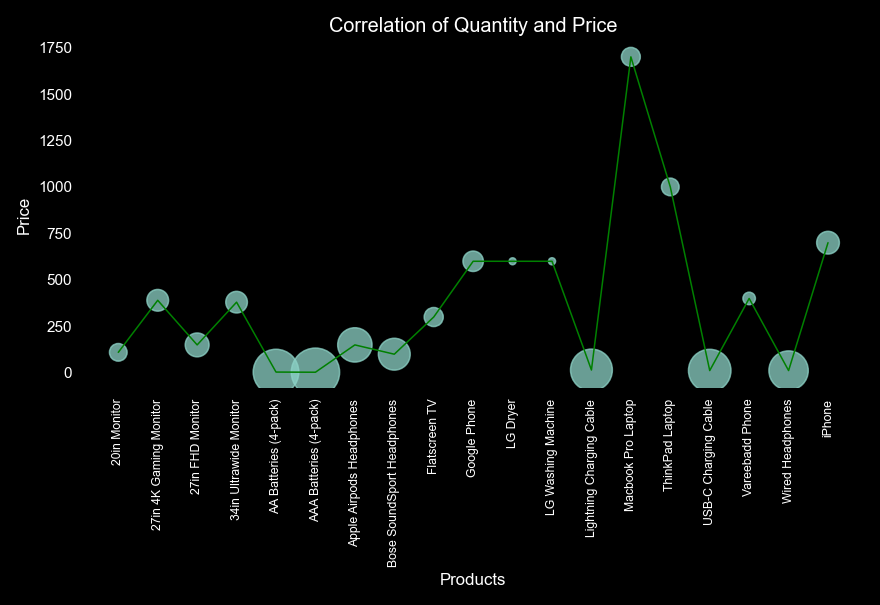

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [288]:
plt.style.use('dark_background')

x = freq_table['Product']
y =freq_table['Price Each']
quantity = product['Quantity Ordered']

max_quantity = max(quantity)
normalized_quantity = quantity / max_quantity

# Set the bubble sizes based on the normalized quantity values
bubble_sizes = 1000 * normalized_quantity

plt.plot(x, y, color='green', linewidth=1)
plt.scatter(x, y,s=bubble_sizes, cmap='Greens', linewidths=1, alpha=0.75)


plt.grid(False)
            
plt.xticks(x, rotation = 90,fontsize=8)

plt.xlabel('Products')
plt.ylabel('Price')
plt.title('Correlation of Quantity and Price',fontsize=13)

plt.legend(bbox_to_anchor = (1 , 1))

plt.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


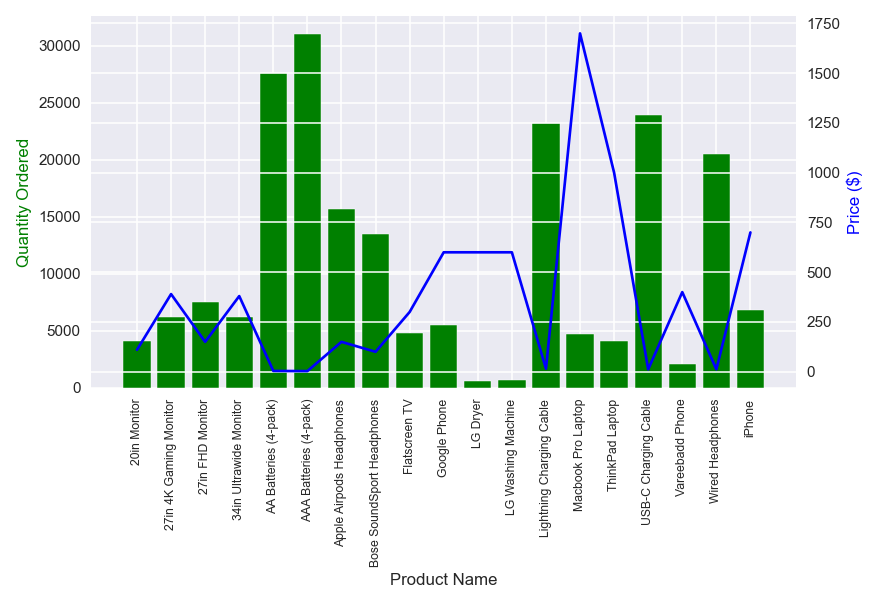

In [292]:
plt.style.use('seaborn')

a = all_data.groupby('Product').mean().reset_index()
b = all_data.groupby('Product').sum().reset_index()

x = a['Product']
y = b['Quantity Ordered']
p = a['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y, color='g')
ax2.plot(x, p, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(x, rotation='vertical', size=8)

plt.tight_layout()

fig.show()

- <b>Insights</b>
	- Observing from the visualization, 
    	- whenever decrease in price there is an increase in Quantity reason why high orders 
          for AAA Batteries and AA Batteries.
        - contrarily,whenever increase in price there is a decrease in Quantity reason why low orders 
          for LG Dryer and LG Washing Machine.
	- However there is some inconsistencies like Macbook Pro and ThinkPad Laptops sold more even the price is high

#### Note:
	- These Macbook Pro and ThinkPad Laptops were sold more in San Fransico, Los angeles, New York, Boston 
      followed by other cities.
    - The Incosistency may be due to higher number of students and working Professionals necessities of these items.